In [1]:
import pandas as pd

In [2]:
train = pd.read_csv('data/train.csv')

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
train['Sex'][train['Sex'] == 'male'] = 0
train['Sex'][train['Sex'] == 'female'] = 1
train['Sex'] = train['Sex'].astype(int)

train['Embarked'][train['Embarked'] == 'C'] = 1
train['Embarked'][train['Embarked'] == 'Q'] = 2
train['Embarked'][train['Embarked'] == 'S'] = 3
train.loc[:, 'Embarked'] = train['Embarked'].fillna(0)
train.loc['Embarked'] = train['Embarked'].astype(int)

train.info()
train.head()

<class 'pandas.core.frame.DataFrame'>
Index: 892 entries, 0 to Embarked
Data columns (total 12 columns):
PassengerId    891 non-null float64
Survived       891 non-null float64
Pclass         891 non-null float64
Name           891 non-null object
Sex            891 non-null float64
Age            714 non-null float64
SibSp          891 non-null float64
Parch          891 non-null float64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       891 non-null float64
dtypes: float64(9), object(3)
memory usage: 90.6+ KB


/Users/ichikiyamasato/.pyenv/versions/3.6.0/lib/python3.6/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)
/Users/ichikiyamasato/.pyenv/versions/3.6.0/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/ichikiyamasato/.pyenv/versions/3.6.0/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/ichikiyamasato/.pyenv/versions/3.

PassengerId  Survived  Pclass  \
0          1.0       0.0     3.0   
1          2.0       1.0     1.0   
2          3.0       1.0     3.0   
3          4.0       1.0     1.0   
4          5.0       0.0     3.0   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris  0.0  22.0    1.0    0.0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  1.0  38.0    1.0    0.0   
2                             Heikkinen, Miss. Laina  1.0  26.0    0.0    0.0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  1.0  35.0    1.0    0.0   
4                           Allen, Mr. William Henry  0.0  35.0    0.0    0.0   

             Ticket     Fare Cabin  Embarked  
0         A/5 21171   7.2500   NaN       3.0  
1          PC 17599  71.2833   C85       1.0  
2  STON/O2. 3101282   7.9250   NaN       3.0  
3            113803  53.1000  C123       3.0  
4            373450   8.0500   NaN       3.0

In [11]:
train.describe()

PassengerId    Survived      Pclass         Sex         Age  \
count   891.000000  891.000000  891.000000  891.000000  714.000000   
mean    446.000000    0.383838    2.308642    0.352413   29.699118   
std     257.353842    0.486592    0.836071    0.477990   14.526497   
min       1.000000    0.000000    1.000000    0.000000    0.420000   
25%     223.500000    0.000000    2.000000    0.000000   20.125000   
50%     446.000000    0.000000    3.000000    0.000000   28.000000   
75%     668.500000    1.000000    3.000000    1.000000   38.000000   
max     891.000000    1.000000    3.000000    1.000000   80.000000   

            SibSp       Parch        Fare    Embarked  
count  891.000000  891.000000  891.000000  891.000000  
mean     0.523008    0.381594   32.204208    2.529742  
std      1.102743    0.806057   49.693429    0.800254  
min      0.000000    0.000000    0.000000    0.000000  
25%      0.000000    0.000000    7.910400    2.000000  
50%      0.000000    0.000000   14.454200    3.000000  
75%      1.000000    0.000000   31.000000    3.000000  
max      8.000000    6.000000  512.329200    3.000000

In [12]:
import matplotlib.pyplot as plt

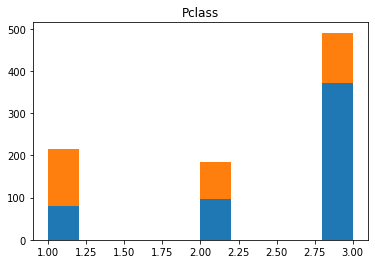

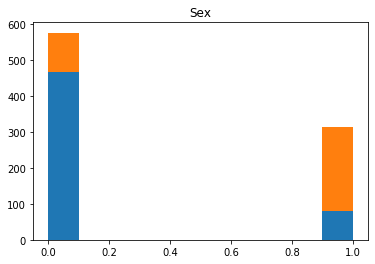

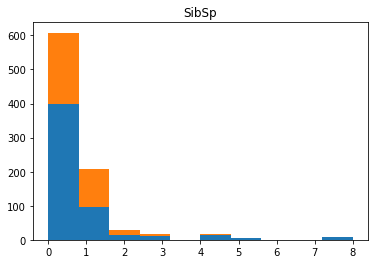

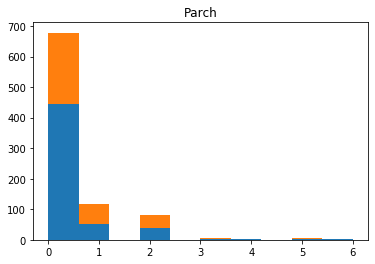

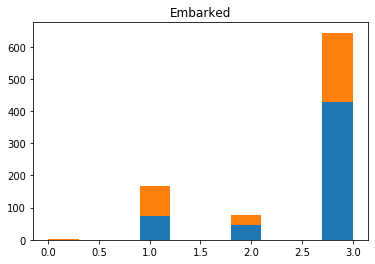

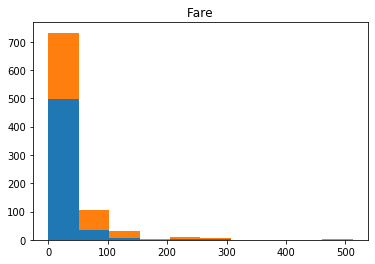

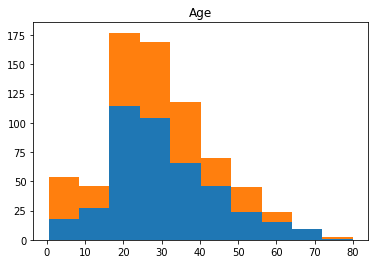

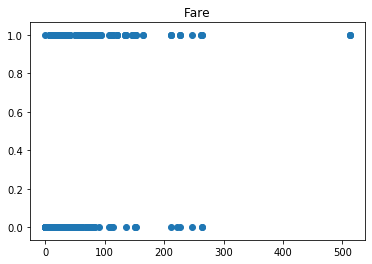

In [13]:
attrs = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked', 'Fare', 'Age']
for attr in attrs:
    plt.title(attr)
    plt.hist([train[attr][train['Survived'] == 0], train[attr][train['Survived'] == 1]],
            stacked=True)
    plt.show()

plt.title('Fare')
plt.scatter(train['Fare'], train['Survived'])
plt.show()

In [16]:
# 欠損うめ
fill_train = train.iloc[:, [0,1,2,4,5,6,7,9]]
med = fill_train['Age'].median()
print(med)
fill_train.loc[:, 'Age'] = fill_train['Age'].fillna(med)
fill_train.info()

28.0
<class 'pandas.core.frame.DataFrame'>
Index: 892 entries, 0 to Embarked
Data columns (total 8 columns):
PassengerId    891 non-null float64
Survived       891 non-null float64
Pclass         891 non-null float64
Sex            891 non-null float64
Age            892 non-null float64
SibSp          891 non-null float64
Parch          891 non-null float64
Fare           891 non-null float64
dtypes: float64(8)
memory usage: 102.7+ KB


/Users/ichikiyamasato/.pyenv/versions/3.6.0/lib/python3.6/site-packages/pandas/core/indexing.py:576: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value
